# Practice Assignment

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Q1-4

In [16]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X, y = load_iris(return_X_y=True, as_frame=True)

kmeans_kwargs = {
    'init' : 'random',
    'n_init' : 50,
    'max_iter' : 500,
    'random_state' : 10,
}

### Q1

In [17]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Q2

In [18]:
km = KMeans(n_clusters=5, **kmeans_kwargs)

km.fit(X)
km.inertia_

46.44618205128205

### Q3

In [21]:
sse_iris = []

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse_iris.append(kmeans.inertia_)

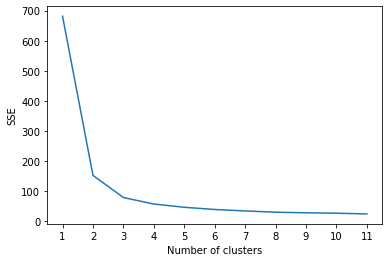

In [23]:
plt.plot(range(1, 12), sse_iris)
plt.xticks(range(1,12))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### Q4

In [25]:
sse_iris[2]

78.85144142614601

## Q5-6

In [28]:
from sklearn.cluster import AgglomerativeClustering

aggc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

aggc.fit(X)

AgglomerativeClustering(n_clusters=3)

### Q5

In [29]:
aggc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

### Q6

In [30]:
aggc.n_leaves_

150

# Graded Assignment

In [67]:
df = pd.read_csv('Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Q1

In [68]:
df.shape

(7050, 16)

### Q2

In [69]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

### Q3 

In [70]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

## Q4-8 (Preprocessing)

In [71]:
y = df.status_type
X = df.drop(axis=1, columns=['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_type', 'status_published' ])

In [72]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


### Q4

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

km2 = KMeans(n_clusters=2, random_state=10)

kmpipe = Pipeline([
    ('scaling', StandardScaler()),
    ('km', km2),
])

kmpipe.fit(X)
kmpipe[-1].inertia_

48278.098242205444

### Q5

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)  # encoded y


# Refit kmpipeline with k=4
km2 = KMeans(n_clusters=4, random_state=10)
kmpipe = Pipeline([
    ('scaling', StandardScaler()),
    ('km', km2),
])
kmpipe.fit(X)
y_pred = kmpipe[-1].labels_

In [93]:
len(np.where(y_enc==y_pred)[0])

4421

### Q6

In [95]:
aggc2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

aggcpipe = Pipeline([
    ('scaling', StandardScaler()),
    ('aggc', aggc2),
])

aggcpipe.fit(X)

Pipeline(steps=[('scaling', StandardScaler()),
                ('aggc', AgglomerativeClustering(n_clusters=4))])

In [100]:
y_pred = aggcpipe[-1].labels_
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

### Q7

In [101]:
aggcpipe[-1].n_leaves_

7050

### Q8

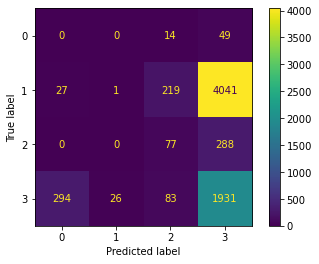

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

cm = confusion_matrix(y_enc, y_pred)
ConfusionMatrixDisplay.from_predictions(y_enc, y_pred)

In [106]:
print(classification_report(y_enc, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.04      0.00      0.00      4288
           2       0.20      0.21      0.20       365
           3       0.31      0.83      0.45      2334

    accuracy                           0.28      7050
   macro avg       0.13      0.26      0.16      7050
weighted avg       0.13      0.28      0.16      7050

